In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyBboxPatch


In [41]:
class predictions_file():
    def __init__(self, file) -> None:
        self.file = file
        
        self.df = pd.read_csv(self.file)

        self.test_df = self.df.loc[self.df['partition'] == 'test']
        
        self.test_monomer = self.test_df['SMILES+Molar'].unique()[0].split(' (')[0]

In [42]:
def analyze_files(files):
    test_sets = [predictions_file(file).test_df for file in files]
    df = pd.concat(test_sets)
    predictions_dict_overview = {i: {} for i in df['SMILES+Molar'].unique()}

    for name in df['SMILES+Molar'].unique():
        df_part = df.loc[df['SMILES+Molar'] == name]

        true_value = df_part['rate_bin'].unique()[0]

        predictions = df_part['prediction'].tolist()

        accuracy = predictions.count(true_value) / len(predictions)

        predictions_dict_overview[name].update({'true': true_value,
                                                'predictions':predictions,
                                                'accuracy': accuracy})
    return predictions_dict_overview


In [43]:
def get_accuracy_color(acc):
    if acc == 5/5:
        color = 'navy'
    elif acc == 4/5:
        color = 'darkblue'
    elif acc == 3/5:
        color = 'mediumblue'
    elif acc == 2/5:
        color = 'royalblue'
    elif acc == 1/5:
        color = 'cornflowerblue'
    elif acc == 0/5:
        color = 'lightsteelblue'
    else:
        color = 'blue'
    return color

In [44]:
def calculate_accuracy(folder, epoch, set):
    files = [os.path.join(folder,file) for file in os.listdir(folder) if file.endswith(f'_{epoch}epoch_{set}.csv')]
    print(files)

In [45]:
def plot_predictions(folder = 'predictions'):
  predictions_csv = os.listdir(folder)
  predictions_dict = {i: [os.path.join(folder,file) for file in predictions_csv if file.endswith(f"{i}.csv")] for i in range(8)}
  n_rows = len(predictions_dict)
  n_cols = 3 # 3 epochs

  fig, ax = plt.subplots(1,1, tight_layout = True)

  ax.hlines(range(9), 0,3, colors='black', alpha = 0.5)
  ax.vlines(range(4), 0,8, colors='black', alpha = 0.5)

  EPOCHS_LIST = [25,50,100]
  epochs_acc = {e:[] for e in EPOCHS_LIST}

  for i in range(8):
      for j, epoch in enumerate(EPOCHS_LIST):
          #calculate_accuracy(folder, epoch, i)
          files = [os.path.join(folder,file) for file in os.listdir(folder) if file.endswith(f'_{epoch}epoch_{i}.csv')]
          if files:
            predictions_dict2 = analyze_files(files)
            for z, (molar,dic) in enumerate(predictions_dict2.items()):
                epochs_acc[epoch].append(dic['accuracy'])
                ax.add_patch(Rectangle((j + z/3, i), 0.3, 1,
                                        #boxstyle='round',
                                        edgecolor = 'white',
                                        facecolor = get_accuracy_color(dic['accuracy']),
                                        fill=True,
                                        lw=5))

  ax.set_axis_off()
  for i, epoch in enumerate(EPOCHS_LIST):
    ax.text(0.5 + i, 9, f'{epoch} Epochs', rotation = 45, size = 12)

  for i, molar in enumerate([1,2,4]):
    for j in range(3):
      ax.text((0.1 +j + i/3), 8.3, f'{molar} M', rotation = 0)

  names = {k: predictions_file(v[0]).test_monomer for k,v in predictions_dict.items()}

  for i, name in names.items():
    ax.text(-1.5, i+0.5 , name)

  #for i in range(3):
    #ax.text(0.1+i, 7.5 , '0.5 M', size = 5)
    #ax.text(0.1 +1/3+i, 7.5 , '1 M', size = 5)
  for e, accs in epochs_acc.items():
     print(f'{e} epochs')
     print(len(accs))
     print(f'Accuracy: {100*round(sum(accs) /len(accs), 4)} %')



GPTJ
25 epochs
23
Accuracy: 75.64999999999999 %
50 epochs
23
Accuracy: 80.0 %
100 epochs
23
Accuracy: 79.13 %


/tmp/ipykernel_2907827/2632431817.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig('polyrate_leaveOneSetOut_gptj.pdf', bbox_inches='tight')


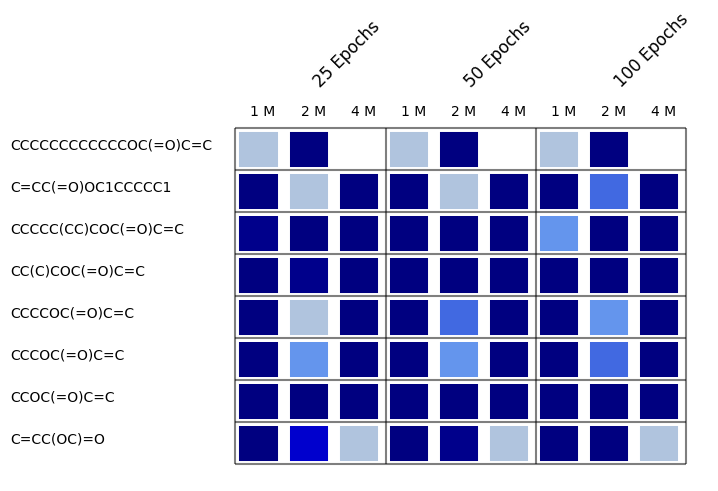

In [46]:
print("GPTJ")
plot_predictions('LeaveOneSetOut_models/predictions')
plt.savefig('polyrate_leaveOneSetOut_gptj.pdf', bbox_inches='tight')


Llama
25 epochs
23
Accuracy: 76.52 %
50 epochs
23
Accuracy: 82.61 %
100 epochs
23
Accuracy: 83.48 %


/tmp/ipykernel_2907827/75698022.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig('polyrate_leaveOneSetOut_llama.pdf', bbox_inches='tight')


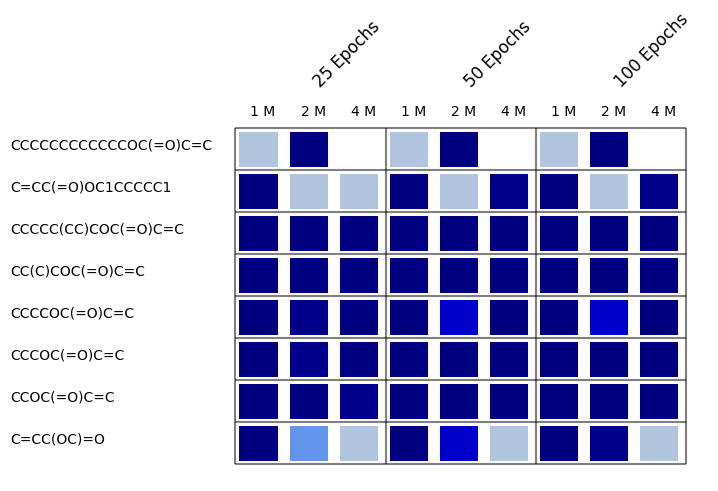

In [47]:
print('Llama')
plot_predictions(folder = 'LeaveOneSetOut_models/predictions_llama')
plt.savefig('polyrate_leaveOneSetOut_llama.pdf', bbox_inches='tight')


mistral
25 epochs
23
Accuracy: 73.04 %
50 epochs
23
Accuracy: 80.0 %
100 epochs
23
Accuracy: 80.87 %


/tmp/ipykernel_2907827/3584702239.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.savefig('polyrate_leaveOneSetOut_mistral.pdf', bbox_inches='tight')


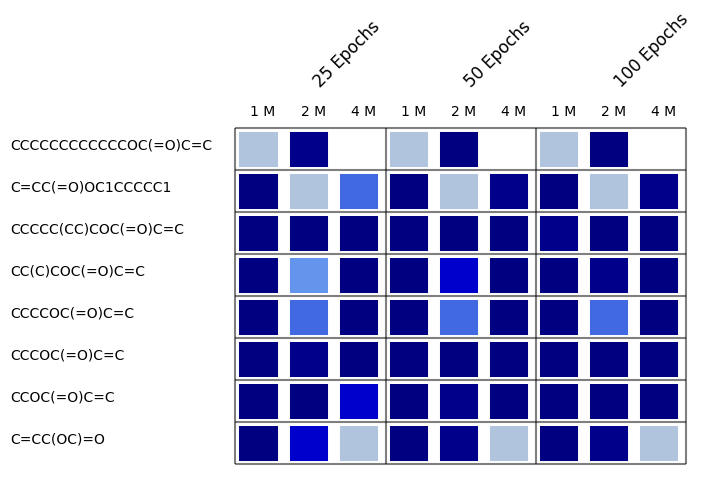

In [48]:
print('mistral')
plot_predictions(folder = 'LeaveOneSetOut_models/predictions_mistral')
plt.savefig('polyrate_leaveOneSetOut_mistral.pdf', bbox_inches='tight')
